# Demonstrate use of helper functions I have made for implementing optimisatoin algos

The point of this notebook is to show the test problems I have defined and simple ways to graph the optimisations algos on them. 

The types of problems I have fall into two categories, small 2 parameter problems which can be nicely visualised in 2D with contours for function, or 3D. The other are larger problems with ~100 parameters, accounting for a variety of problem classes which may be encountered in the wild:
- convex
- non-convex
- differentiable 
- non-differentiable 



In [1]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

# 2D Problems

In [2]:
from OptimisationExperiment import OptimisationExperiment
from twoD_test_problems import booth_function 
from jax import grad
import numpy as np
import matplotlib.pyplot as plt 


f = booth_function

def gradient_descent(x_start):
    g = grad(f)
    oe.update(x_start)
    x_curr = x_start
    for i in range(1,40):
        search_direction = -1 * g(x_curr)
        #step_size = exact_line_search(x_curr, search_direction)
        step_size = (1 / ((i+10)/10)) * 0.1
        x_next = x_curr + step_size * search_direction
        oe.update(x_next.copy())
        x_curr = x_next.copy()

oe = OptimisationExperiment(f)
x_start = np.array([-2.0, -2.0])
gradient_descent(x_start)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


### Plot in 3d 

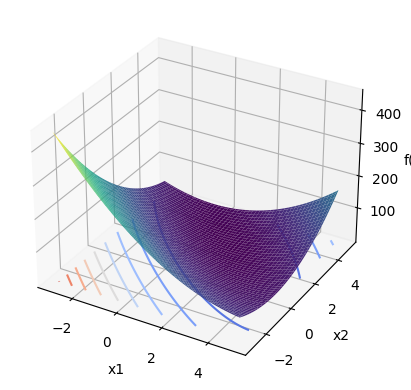

In [3]:
fig, axs = plt.subplots(1,1)
axs.remove()
axs = fig.add_subplot(projection='3d')
oe.plot_descent_three_d(axs)

### Plot in 2D 

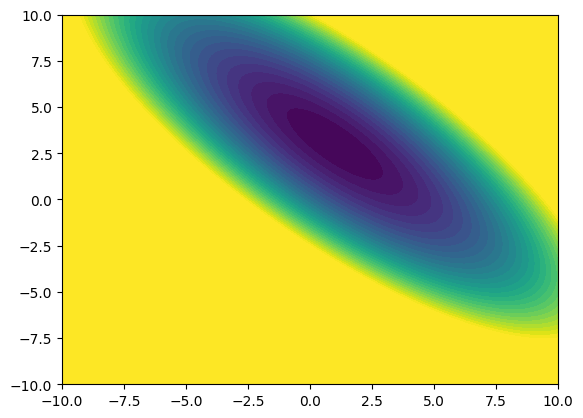

In [4]:
fig, axs = plt.subplots(1,1)
oe.graph_function_contour_two_d(axs)

### Plot Descent

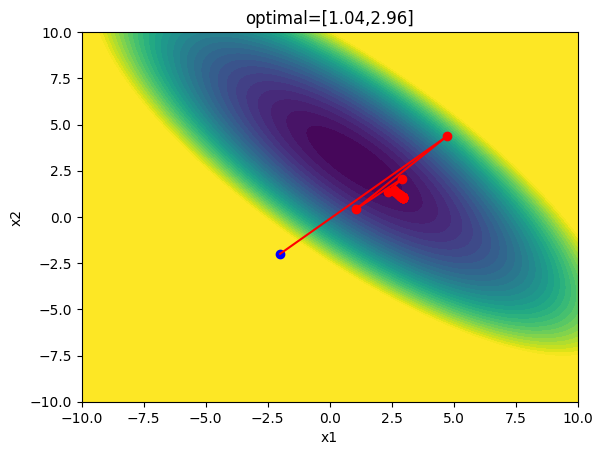

In [5]:
fig, axs = plt.subplots(1,1)
oe.plot_descent_two_d(axs)

### Plot convergence of function value

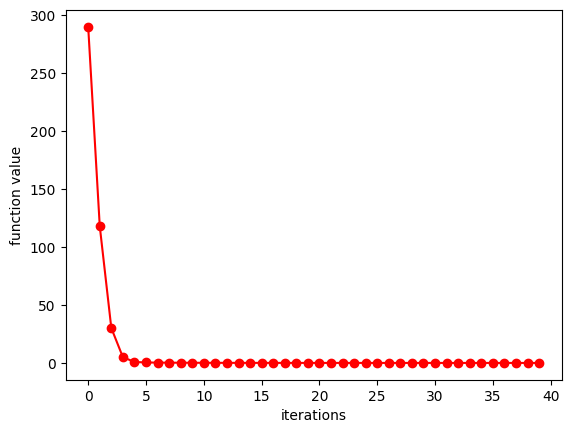

In [6]:
fig, axs = plt.subplots(1,1)
oe.plot_function_vs_iteration_nd(axs)

# Large problems for different classes

- LP (convex, differentiable)
- Mixed Integer QP (non-convex, differentiable)
- Piecewise Affine (convex, nondifferentiable)

First an LP:

In [72]:
import cvxpy as cp 
from problems import LinearProgram

m = 100
n = 20
p = 10

lp = LinearProgram(m=100, n=20, p=10)

x = cp.Variable(n)
objective = cp.Minimize(lp.c @ x)
prob = cp.Problem(objective, constraints=[lp.A @ x <= lp.b])
prob.solve()

-4.127939430472783

Mixed Integer QP :


In [80]:
from problems import MixedIntegerQuadraticProgram
m=40
n=25
miqp = MixedIntegerQuadraticProgram(m, n)
x = cp.Variable(n, integer=True)
objective = cp.Minimize(cp.sum_squares(miqp.A@x - miqp.b))
prob = cp.Problem(objective)
prob.solve(solver='ECOS_BB')

/home/fergus/.local/lib/python3.10/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


20.43690262982215

In [82]:
from problems import PiecewiseAffineProgram
m = 100
n = 20
pap = PiecewiseAffineProgram(m, n)
x = cp.Variable(n)
objective = cp.Minimize(cp.max(pap.A @ x - pap.b))
prob = cp.Problem(objective)
prob.solve()



-0.19563948635964373